In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

data = pd.read_csv('/kaggle/input/ria-news/ria_news.csv', sep='\t')


In [4]:
data = data.drop(data.columns[[0]], axis = 1)
data

,topic,content,views,link,timestamp
0,Постпредство России прокомментировало решение ...,"ПАРИЖ, 25 янв – РИА Новости. Решение о включен...",52686,https://ria.ru/20230125/odessa-1847424468.html,2023-02-05 17:12:42
1,"""Всплыли грязные дела"". В Киеве заявили о приб...","МОСКВА, 25 янв — РИА Новости. Кадровая чехарда...",179330,https://ria.ru/20230125/zelenskiy-1847425072.html,2023-02-05 17:12:46
2,В России замедлилась недельная инфляция,"МОСКВА, 25 янв - РИА Новости. Инфляция в Росси...",600,https://ria.ru/20230125/inflyatsiya-1847425347...,2023-02-05 17:12:49
3,Монеточка* отменила выступления в России,"МОСКВА, 25 янв - РИА Новости. Певица Монеточка...",7738,https://ria.ru/20230125/monetochka-1847419695....,2023-02-05 17:12:51
4,В Германии мужчина с ножом напал на пассажиров...,"БЕРЛИН, 25 янв - РИА Новости. Семь человек пол...",8579,https://ria.ru/20230125/napadenie-1847425788.html,2023-02-05 17:12:52
...,...,...,...,...,...
3980,Польские военные разворачивают ЗРК Patriot на ...,"ВАРШАВА, 5 фев — РИА Новости. Польские военные...",19259,https://ria.ru/20230205/polsha-1849868501.html,2023-02-05 19:30:06
3981,Украинские войска выпустили по Кременной четыр...,"ЛУГАНСК, 5 фев - РИА Новости. Украинские войск...",7258,https://ria.ru/20230205/kremennaya-1849868616....,2023-02-05 19:30:07
3982,Минпросвещения планирует провести в этом году ...,"МОСКВА, 5 фев - РИА Новости. Министр просвещен...",426,https://ria.ru/20230205/forum-1849868741.html,2023-02-05 19:30:09
3983,"Британцы назвали указ Путина, который ""заткнул...","МОСКВА, 5 фев — РИА Новости. Читатели Daily Ma...",55790,https://ria.ru/20230205/zapad-1849869296.html,2023-02-05 19:30:11


In [5]:
data = data.drop(data.columns[[3]], axis = 1)
data

,topic,content,views,timestamp
0,Постпредство России прокомментировало решение ...,"ПАРИЖ, 25 янв – РИА Новости. Решение о включен...",52686,2023-02-05 17:12:42
1,"""Всплыли грязные дела"". В Киеве заявили о приб...","МОСКВА, 25 янв — РИА Новости. Кадровая чехарда...",179330,2023-02-05 17:12:46
2,В России замедлилась недельная инфляция,"МОСКВА, 25 янв - РИА Новости. Инфляция в Росси...",600,2023-02-05 17:12:49
3,Монеточка* отменила выступления в России,"МОСКВА, 25 янв - РИА Новости. Певица Монеточка...",7738,2023-02-05 17:12:51
4,В Германии мужчина с ножом напал на пассажиров...,"БЕРЛИН, 25 янв - РИА Новости. Семь человек пол...",8579,2023-02-05 17:12:52
...,...,...,...,...
3980,Польские военные разворачивают ЗРК Patriot на ...,"ВАРШАВА, 5 фев — РИА Новости. Польские военные...",19259,2023-02-05 19:30:06
3981,Украинские войска выпустили по Кременной четыр...,"ЛУГАНСК, 5 фев - РИА Новости. Украинские войск...",7258,2023-02-05 19:30:07
3982,Минпросвещения планирует провести в этом году ...,"МОСКВА, 5 фев - РИА Новости. Министр просвещен...",426,2023-02-05 19:30:09
3983,"Британцы назвали указ Путина, который ""заткнул...","МОСКВА, 5 фев — РИА Новости. Читатели Daily Ma...",55790,2023-02-05 19:30:11


In [6]:
data = data.drop(data.columns[[3]], axis = 1)
data

,topic,content,views
0,Постпредство России прокомментировало решение ...,"ПАРИЖ, 25 янв – РИА Новости. Решение о включен...",52686
1,"""Всплыли грязные дела"". В Киеве заявили о приб...","МОСКВА, 25 янв — РИА Новости. Кадровая чехарда...",179330
2,В России замедлилась недельная инфляция,"МОСКВА, 25 янв - РИА Новости. Инфляция в Росси...",600
3,Монеточка* отменила выступления в России,"МОСКВА, 25 янв - РИА Новости. Певица Монеточка...",7738
4,В Германии мужчина с ножом напал на пассажиров...,"БЕРЛИН, 25 янв - РИА Новости. Семь человек пол...",8579
...,...,...,...
3980,Польские военные разворачивают ЗРК Patriot на ...,"ВАРШАВА, 5 фев — РИА Новости. Польские военные...",19259
3981,Украинские войска выпустили по Кременной четыр...,"ЛУГАНСК, 5 фев - РИА Новости. Украинские войск...",7258
3982,Минпросвещения планирует провести в этом году ...,"МОСКВА, 5 фев - РИА Новости. Министр просвещен...",426
3983,"Британцы назвали указ Путина, который ""заткнул...","МОСКВА, 5 фев — РИА Новости. Читатели Daily Ma...",55790


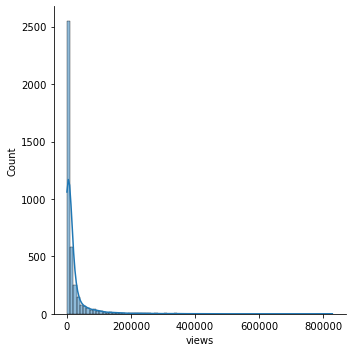

In [7]:
# !pip install seaborn
import seaborn as sns
sns.displot(data['views'], bins=82, kde=True);

In [8]:
for i, row in data.iterrows():
    if(int(row["views"]) <= 1000): data.at[i, 'category'] = "Very boring"
    elif(int(row["views"]) > 1000 and int(row["views"]) <= 2000): data.at[i, 'category'] = "Boring"
    elif(int(row["views"]) > 2000 and int(row["views"]) <= 5000): data.at[i, 'category'] = "Weak interest"
    elif(int(row["views"]) > 5000 and int(row["views"]) <= 10000): data.at[i, 'category'] = "Mid interest"
    elif(int(row["views"]) > 10000 and int(row["views"]) <= 40000): data.at[i, 'category'] = "Good interest"
    else: data.at[i, 'category'] = "Super interest"

In [9]:
data

,topic,content,views,category
0,Постпредство России прокомментировало решение ...,"ПАРИЖ, 25 янв – РИА Новости. Решение о включен...",52686,Super interest
1,"""Всплыли грязные дела"". В Киеве заявили о приб...","МОСКВА, 25 янв — РИА Новости. Кадровая чехарда...",179330,Super interest
2,В России замедлилась недельная инфляция,"МОСКВА, 25 янв - РИА Новости. Инфляция в Росси...",600,Very boring
3,Монеточка* отменила выступления в России,"МОСКВА, 25 янв - РИА Новости. Певица Монеточка...",7738,Mid interest
4,В Германии мужчина с ножом напал на пассажиров...,"БЕРЛИН, 25 янв - РИА Новости. Семь человек пол...",8579,Mid interest
...,...,...,...,...
3980,Польские военные разворачивают ЗРК Patriot на ...,"ВАРШАВА, 5 фев — РИА Новости. Польские военные...",19259,Good interest
3981,Украинские войска выпустили по Кременной четыр...,"ЛУГАНСК, 5 фев - РИА Новости. Украинские войск...",7258,Mid interest
3982,Минпросвещения планирует провести в этом году ...,"МОСКВА, 5 фев - РИА Новости. Министр просвещен...",426,Very boring
3983,"Британцы назвали указ Путина, который ""заткнул...","МОСКВА, 5 фев — РИА Новости. Читатели Daily Ma...",55790,Super interest


In [10]:
import pandas as pd
from pathlib import Path 
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
# pipeline позволяет объединить в один блок трансформер и модель, что упрощает написание кода и улучшает его читаемость
from sklearn.feature_extraction.text import TfidfVectorizer
# TfidfVectorizer преобразует тексты в числовые вектора, отражающие важность использования каждого слова из некоторого набора слов (количество слов набора определяет размерность вектора) в каждом тексте
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
# линейный классификатор и классификатор методом ближайших соседей
from sklearn import metrics
# набор метрик для оценки качества модели
from sklearn.model_selection import GridSearchCV
# модуль поиска по сетке параметров
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from string import punctuation
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
# Получение текстовой строки из списка слов
def str_corpus(corpus):
    str_corpus = ''
    for i in corpus:
        str_corpus += ' ' + i
    str_corpus = str_corpus.strip()
    return str_corpus
# Получение списка всех слов в корпусе
def get_corpus(data):
    corpus = []
    for phrase in data:
        for word in phrase.split():
            corpus.append(word)
    return corpus
# Получение облака слов
def get_wordCloud(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(str_corpus(corpus))
    return wordCloud


# Удаление знаков пунктуации из текста
def remove_punct(text):
    table = {33: ' ', 34: ' ', 35: ' ', 36: ' ', 37: ' ', 38: ' ', 39: ' ', 40: ' ', 41: ' ', 42: ' ', 43: ' ', 44: ' ', 45: ' ', 46: ' ', 47: ' ', 58: ' ', 59: ' ', 60: ' ', 61: ' ', 62: ' ', 63: ' ', 64: ' ', 91: ' ', 92: ' ', 93: ' ', 94: ' ', 95: ' ', 96: ' ', 123: ' ', 124: ' ', 125: ' ', 126: ' '}
    return text.translate(table)

In [12]:
russian_stopwords = stopwords.words("russian")

In [13]:
data['Post_clean'] = data['content'].map(lambda x: x.lower())
data['Post_clean'] = data['Post_clean'].map(lambda x: remove_punct(x))
data['Post_clean'] = data['Post_clean'].map(lambda x: x.split(' '))
data['Post_clean'] = data['Post_clean'].map(lambda x: [token for token in x if token not in russian_stopwords\
                                                                    and token != " " \
                                                                    and token.strip() not in punctuation])
data['Post_clean'] = data['Post_clean'].map(lambda x: ' '.join(x))
data['Post_clean'] = data['Post_clean'].str.replace('РИА','')
data['Post_clean'] = data['Post_clean'].str.replace('риа','')
data['Post_clean'] = data['Post_clean'].str.replace('НОВОСТИ','')
data['Post_clean'] = data['Post_clean'].str.replace('новости','')
data['Post_clean'] = data['Post_clean'].str.replace('янв','')
data['Post_clean'] = data['Post_clean'].str.replace('фев','')
data['Post_clean'] = data['Post_clean'].str.replace('ЯНВ','')
data['Post_clean'] = data['Post_clean'].str.replace('ФЕВ','')

In [14]:
X_train, X_valid, y_train, y_valid = train_test_split(data['Post_clean'], data['category'], test_size=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [15]:
sgd_ppl_clf = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('sgd_clf', SGDClassifier(random_state=42))])
knb_ppl_clf = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('knb_clf', KNeighborsClassifier(n_neighbors=10))])
sgd_ppl_clf.fit(X_train, y_train)
knb_ppl_clf.fit(X_train, y_train)

predicted_sgd = sgd_ppl_clf.predict(X_test)
print(metrics.classification_report(predicted_sgd, y_test))

                precision    recall  f1-score   support

        Boring       0.22      0.26      0.24        82
 Good interest       0.34      0.27      0.30       201
  Mid interest       0.24      0.30      0.27        93
Super interest       0.38      0.48      0.42        79
   Very boring       0.46      0.52      0.49        96
 Weak interest       0.37      0.31      0.33       167

      accuracy                           0.34       718
     macro avg       0.34      0.36      0.34       718
  weighted avg       0.34      0.34      0.34       718



In [16]:
predicted_sgd = knb_ppl_clf.predict(X_test)
print(metrics.classification_report(predicted_sgd, y_test))

                precision    recall  f1-score   support

        Boring       0.28      0.22      0.25       122
 Good interest       0.42      0.31      0.36       217
  Mid interest       0.13      0.26      0.17        57
Super interest       0.33      0.52      0.40        64
   Very boring       0.49      0.57      0.53        93
 Weak interest       0.38      0.32      0.35       165

      accuracy                           0.35       718
     macro avg       0.34      0.37      0.34       718
  weighted avg       0.37      0.35      0.35       718



In [17]:
sgd_ppl_clf = Pipeline([
        ('tfidf', TfidfVectorizer(ngram_range=(1, 2))),
        ('sgd_clf', SGDClassifier(penalty='elasticnet', class_weight='balanced', random_state=42))])
sgd_ppl_clf.fit(X_train, y_train)
predicted_sgd = sgd_ppl_clf.predict(X_test)
print(metrics.classification_report(predicted_sgd, y_test))

                precision    recall  f1-score   support

        Boring       0.25      0.24      0.24       102
 Good interest       0.23      0.30      0.26       124
  Mid interest       0.27      0.27      0.27       116
Super interest       0.56      0.43      0.49       130
   Very boring       0.56      0.50      0.53       119
 Weak interest       0.30      0.33      0.32       127

      accuracy                           0.35       718
     macro avg       0.36      0.34      0.35       718
  weighted avg       0.37      0.35      0.35       718



In [18]:
predicted_sgd_val = sgd_ppl_clf.predict(X_valid)
print(metrics.classification_report(predicted_sgd_val, y_valid))

                precision    recall  f1-score   support

        Boring       0.29      0.23      0.26        64
 Good interest       0.25      0.36      0.29        72
  Mid interest       0.23      0.23      0.23        71
Super interest       0.53      0.33      0.41        60
   Very boring       0.53      0.54      0.53        54
 Weak interest       0.22      0.22      0.22        78

      accuracy                           0.31       399
     macro avg       0.34      0.32      0.32       399
  weighted avg       0.32      0.31      0.31       399



In [19]:
data

,topic,content,views,category,Post_clean
0,Постпредство России прокомментировало решение ...,"ПАРИЖ, 25 янв – РИА Новости. Решение о включен...",52686,Super interest,париж 25 – решение включении исторического ...
1,"""Всплыли грязные дела"". В Киеве заявили о приб...","МОСКВА, 25 янв — РИА Новости. Кадровая чехарда...",179330,Super interest,москва 25 — кадровая чехарда украинском пра...
2,В России замедлилась недельная инфляция,"МОСКВА, 25 янв - РИА Новости. Инфляция в Росси...",600,Very boring,москва 25 инфляция россии неделе 17 23 аря ...
3,Монеточка* отменила выступления в России,"МОСКВА, 25 янв - РИА Новости. Певица Монеточка...",7738,Mid interest,москва 25 певица монеточка елизавета гырдым...
4,В Германии мужчина с ножом напал на пассажиров...,"БЕРЛИН, 25 янв - РИА Новости. Семь человек пол...",8579,Mid interest,берлин 25 семь человек получили ножевые ран...
...,...,...,...,...,...
3980,Польские военные разворачивают ЗРК Patriot на ...,"ВАРШАВА, 5 фев — РИА Новости. Польские военные...",19259,Good interest,варшава 5 — польские военные разворачивают ...
3981,Украинские войска выпустили по Кременной четыр...,"ЛУГАНСК, 5 фев - РИА Новости. Украинские войск...",7258,Mid interest,луганск 5 украинские войска выпустили креме...
3982,Минпросвещения планирует провести в этом году ...,"МОСКВА, 5 фев - РИА Новости. Министр просвещен...",426,Very boring,москва 5 министр просвещения россии сергей ...
3983,"Британцы назвали указ Путина, который ""заткнул...","МОСКВА, 5 фев — РИА Новости. Читатели Daily Ma...",55790,Super interest,москва 5 — читатели daily mail оценили ново...


In [20]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=russian_stopwords)
X = vectorizer.fit_transform(data["Post_clean"]).toarray()

In [21]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, data["category"], test_size=0.2, random_state=0)

In [27]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train, y_train) 

RandomForestClassifier(n_estimators=1000, random_state=0)

In [28]:
y_pred = classifier.predict(X_test)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[  8  34   3   1   9  38]
 [  4 117  10  16   5  41]
 [  3  76   6   1   2  50]
 [  0  63   3  27   1   9]
 [ 11  19   2   1  42  27]
 [  9  78   8   0   3  70]]
                precision    recall  f1-score   support

        Boring       0.23      0.09      0.12        93
 Good interest       0.30      0.61      0.40       193
  Mid interest       0.19      0.04      0.07       138
Super interest       0.59      0.26      0.36       103
   Very boring       0.68      0.41      0.51       102
 Weak interest       0.30      0.42      0.35       168

      accuracy                           0.34       797
     macro avg       0.38      0.30      0.30       797
  weighted avg       0.36      0.34      0.31       797

0.33877038895859474


In [30]:
for i, row in data.iterrows():
    if(row["category"] == "Very boring" ): data.at[i, 'category_int'] = 1
    elif(row["category"] == "Boring" ): data.at[i, 'category_int'] = 2
    elif(row["category"] == "Weak interest"): data.at[i, 'category_int'] = 3
    elif(row["category"] == "Mid interest"): data.at[i, 'category_int'] = 4
    elif(row["category"] == "Good interest"): data.at[i, 'category_int'] = 5
    else: data.at[i, 'category_int'] = 6

In [37]:
X.shape

(3985, 1500)

In [39]:
np.savetxt("X.csv", X, delimiter=",")

In [40]:
from sklearn.neural_network import MLPClassifier
nn_model = MLPClassifier(activation='relu',max_iter=1000)

In [41]:
nn_model.fit(X_train, y_train)

MLPClassifier(max_iter=1000)

In [43]:
y_pred = nn_model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[17 12 14  4 18 28]
 [29 70 31 22  5 36]
 [28 38 26  9  8 29]
 [ 5 42 15 32  2  7]
 [22  9 10  1 40 20]
 [28 42 30  9  9 50]]
                precision    recall  f1-score   support

        Boring       0.13      0.18      0.15        93
 Good interest       0.33      0.36      0.34       193
  Mid interest       0.21      0.19      0.20       138
Super interest       0.42      0.31      0.36       103
   Very boring       0.49      0.39      0.43       102
 Weak interest       0.29      0.30      0.30       168

      accuracy                           0.29       797
     macro avg       0.31      0.29      0.30       797
  weighted avg       0.31      0.29      0.30       797

0.2948557089084065


In [44]:
for i, row in data.iterrows():
    if(int(row["views"]) <= 1500): data.at[i, 'category_int'] = 0
    else: data.at[i, 'category_int'] = 1

In [45]:
nn_model = MLPClassifier(activation='relu',max_iter=1000)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, data["category_int"], test_size=0.2, random_state=0)

In [47]:
nn_model.fit(X_train, y_train)

MLPClassifier(max_iter=1000)

In [48]:
y_pred = nn_model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[ 65  90]
 [ 61 581]]
              precision    recall  f1-score   support

         0.0       0.52      0.42      0.46       155
         1.0       0.87      0.90      0.88       642

    accuracy                           0.81       797
   macro avg       0.69      0.66      0.67       797
weighted avg       0.80      0.81      0.80       797

0.8105395232120451
